In [1]:
import numpy as np
import torch

from envs.IBGym_mod_envs import IBGymQ
from state_quantization.transforms import NormalizeTransform
from dynamic_programming.mdp_model import DPPolicy
import matplotlib.pyplot as plt
from envs.env_creator import env_creator

In [2]:


device = 'cpu'


env = env_creator(config=None,)

policy_save_path = 'dynamic_programming/ib_policy.pkl'
policy = DPPolicy.load(policy_save_path)

<class 'state_quantization.forcasting_quantization_models.ForcastingQuant'>


/home/hamza/PycharmProjects/StateCompression/venv/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


In [3]:
policy.policy_table

array([15,  3, 25, 17, 12, 11, 13, 12, 11,  5,  1, 21,  3, 10,  2,  2,  8,
        1,  9,  3, 11,  4,  1, 22,  4,  2, 19,  1, 18,  9,  9,  9,  4,  0,
       11,  9,  7,  0, 15, 25,  7,  5, 25, 15,  9, 17,  6,  4,  9, 22, 23,
        8,  6, 24,  3,  6,  6, 20, 19, 14, 17,  0,  4,  6,  0, 16, 22, 23,
       26,  7, 17,  6, 16,  7, 15,  1,  2, 20, 18,  0, 10,  3, 26, 19,  7,
       16, 12,  8, 10, 17, 21, 25,  2, 24, 22, 23, 23, 24, 23, 26, 21, 13])

In [4]:
total_epochs = 0
episodes = 25
avg_ep_reward = 0

without_random_action_rewards = []
with_random_action_rewards = []
states_each_ep = []
actions_each_ep = []

for i in range(episodes):
    print(f'Episode: {i}')
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0

    done = False
    total_rewards = 0
    random_action = False

    #states_enc = set()
    states = []
    actions = []
    while not done:
        states.append(state)
        if state in policy.state_to_index:
            action = policy.get_action(state)
        else:
            action = env.action_space.sample()
            random_action = True
        actions.append(action)
        state, reward, done, info = env.step(action)


        epochs += 1

        total_rewards += reward
    if random_action:
        with_random_action_rewards.append(total_rewards/env.reset_after_timesteps)
        print('random action taken')
    else:
        without_random_action_rewards.append(total_rewards/env.reset_after_timesteps)
    states_each_ep.append(states)
    actions_each_ep.append(actions)
    print((total_rewards/env.reset_after_timesteps))
    avg_ep_reward += (total_rewards/env.reset_after_timesteps)
    total_epochs += epochs
    print(f'States this episode: {np.unique(states_each_ep[-1]).size}')

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average Reward per episode: {avg_ep_reward / episodes}")


Episode: 0
-183.33500750320016
States this episode: 8
Episode: 1
-187.4137171113752
States this episode: 20
Episode: 2
-184.89672890910396
States this episode: 11
Episode: 3
-184.72751474633466
States this episode: 22
Episode: 4
-187.90238608818834
States this episode: 20
Episode: 5
-186.72761835496595
States this episode: 18
Episode: 6
-184.99595919838023
States this episode: 17
Episode: 7
-183.57623590838628
States this episode: 15
Episode: 8
-184.4269437404292
States this episode: 17
Episode: 9
-185.92967594825924
States this episode: 18
Episode: 10
-185.6966399897118
States this episode: 18
Episode: 11
-184.227418362455
States this episode: 17
Episode: 12
-183.97938401738446
States this episode: 11
Episode: 13
-182.21048701336596
States this episode: 14
Episode: 14
-187.17973551913033
States this episode: 20
Episode: 15
-183.33006968079275
States this episode: 13
Episode: 16
-189.3910913853471
States this episode: 24
Episode: 17
-183.53806870264557
States this episode: 22
Episode: 

In [5]:
#print(f'Average Reward with random actions {sum(with_random_action_rewards)/len(with_random_action_rewards)}')
print(f'Average Reward without random actions {sum(without_random_action_rewards)/len(without_random_action_rewards)}')

Average Reward without random actions -185.2220759411143


In [6]:
without_random_action_rewards

[-183.33500750320016,
 -187.4137171113752,
 -184.89672890910396,
 -184.72751474633466,
 -187.90238608818834,
 -186.72761835496595,
 -184.99595919838023,
 -183.57623590838628,
 -184.4269437404292,
 -185.92967594825924,
 -185.6966399897118,
 -184.227418362455,
 -183.97938401738446,
 -182.21048701336596,
 -187.17973551913033,
 -183.33006968079275,
 -189.3910913853471,
 -183.53806870264557,
 -184.41570891244683,
 -184.80535456561435,
 -185.63120666245695,
 -186.2310623449033,
 -187.31088391208883,
 -184.2077922534647,
 -184.46520769742665]

In [7]:
un, inv = np.unique(states_each_ep,return_inverse=True)
inv = np.array(np.split(inv, len(states_each_ep)))

In [8]:
un.size

31

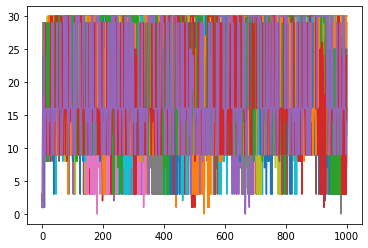

In [9]:
for ep in inv:
    plt.plot(ep)
plt.show()

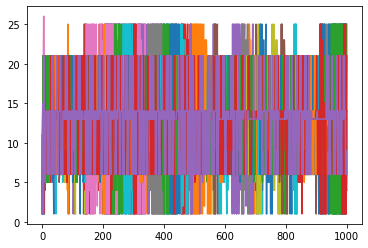

In [10]:
for ep_act in actions_each_ep:
    plt.plot(ep_act)
plt.show()

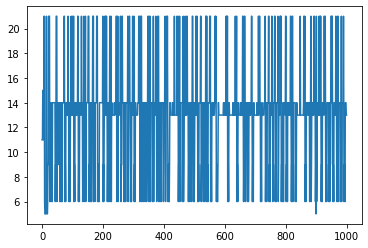

In [11]:
plt.plot(actions_each_ep[0])